In [8]:
import math 
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

###### All in MKS
E [kWh]
DL [kg/m2]
PL [kg/kW]


In [9]:
g=9.81
rho=1.18
PAX=4
Range=200
Prop_Blade=4
Prop_Diam=2
L_D=11

$$ E = E_{capacityFade}+E_{empty}+E_{cruize}+E_{hover}+E_{reserve} $$
$$ Range = E_{cruize}.\eta_{prop}.\frac{L}{D}.\frac{1}{g}.\frac{m_{bat}}{m_{tot}} $$

$$ PL = FM.\sqrt{\frac{2.\rho}{DL}} $$

$$ m_{tot} = m_{bat} +m_{empty} +m_{payload} $$
$$ m_{tot} = m_{bat} +k_{empty}.m_{tot} +m_{payload} $$

In [10]:
def eRange(E,L_D,mbat,mtot):
    eta=0.9
    Range=E*eta*1/g*L_D*mbat/mtot
    return Range
def PowerLoading(FM,DL):
    PL=FM*math.sqrt(2*rho/DL)
    return PL
def mtot(kempty,mbat,mpay):
        mtot=(mbat+mpay)/(1-kempty)
        return mtot

In [11]:
eRange(300,L_D,1000,3000)

100.91743119266054

In [12]:
#Archer
Energy={'Fade':28,'Hover':26,'Cruize':80,'Reserve':37,'Empty':16}
Energy_df=pd.DataFrame(Energy,index=['Archer'])

In [13]:
#Archer
Energy={'Fade':28,'Hover':26,'Cruize':80,'Reserve':37,'Empty':16}

In [14]:
Energy_df

,Fade,Hover,Cruize,Reserve,Empty
Archer,28,26,80,37,16


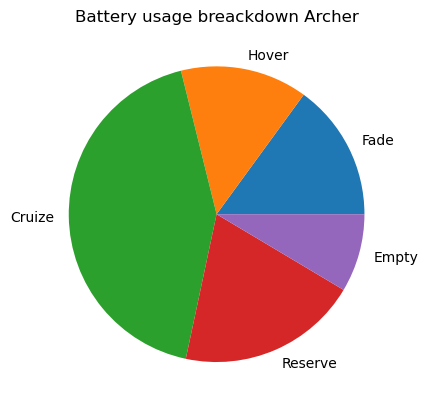

In [32]:
plt.pie(Energy_df.loc['Archer'].values,labels=np.array(Energy_df.columns))
plt.title('Battery usage breackdown Archer')
plt.show()

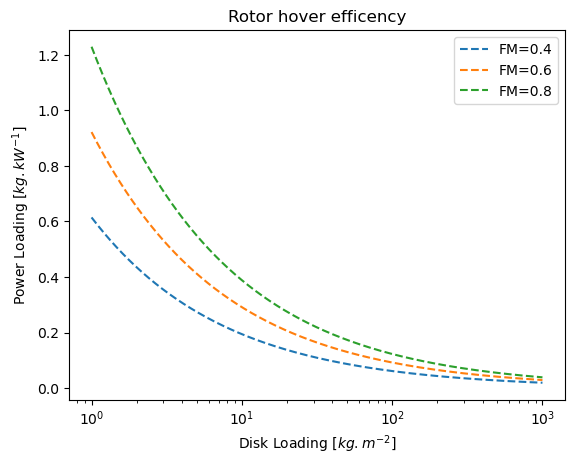

In [16]:
x0=np.linspace(1,1000,1000000)
func=np.vectorize(PowerLoading)
y0=func(0.4,x0)
y1=func(0.6,x0)
y2=func(0.8,x0)

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--')
plt.legend(['FM=0.4','FM=0.6','FM=0.8'], loc='best')
plt.xlabel(r'Disk Loading [$kg.m^{-2}$]')
plt.ylabel(r'Power Loading [$kg.kW^{-1}$]')
plt.xscale("log")
plt.title('Rotor hover efficency')
plt.show()

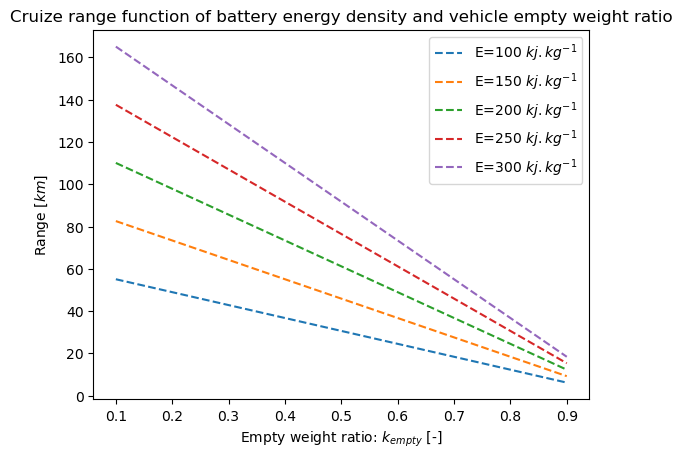

In [30]:
x0=np.linspace(0.1,0.9,9)

vect_mtot=np.vectorize(mtot)
vect_eRange=np.vectorize(eRange)
y0=vect_eRange(100,10,1000,vect_mtot(x0,1000,500))
y1=vect_eRange(150,10,1000,vect_mtot(x0,1000,500))
y2=vect_eRange(200,10,1000,vect_mtot(x0,1000,500))
y3=vect_eRange(250,10,1000,vect_mtot(x0,1000,500))
y4=vect_eRange(300,10,1000,vect_mtot(x0,1000,500))

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')
f4 = interp1d(x0, y4, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--', x0, f4(x0), '--')
plt.legend([r'E=100 $kj.kg^{-1}$',r'E=150 $kj.kg^{-1}$',r'E=200 $kj.kg^{-1}$',r'E=250 $kj.kg^{-1}$',r'E=300 $kj.kg^{-1}$'], loc='best')
plt.xlabel(r'Empty weight ratio: $k_{empty}$ [-]')
plt.ylabel(r'Range [$km$]')
plt.title('Cruize range function of battery energy density and vehicle empty weight ratio')
plt.show()

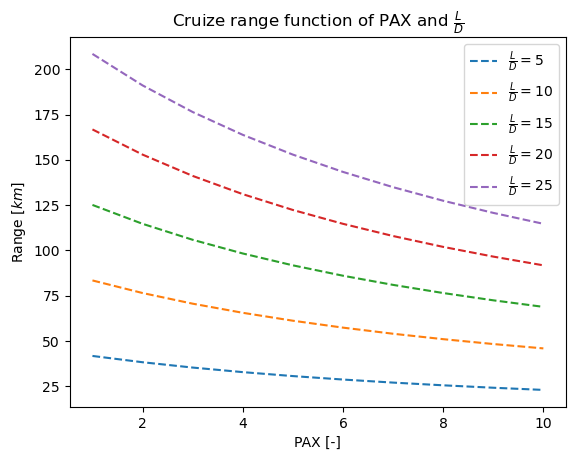

In [42]:
x0=np.linspace(1,10,10)

vect_mtot=np.vectorize(mtot)
vect_eRange=np.vectorize(eRange)
y0=vect_eRange(200,5,1000,vect_mtot(0.5,1000,x0*100))
y1=vect_eRange(200,10,1000,vect_mtot(0.5,1000,x0*100))
y2=vect_eRange(200,15,1000,vect_mtot(0.5,1000,x0*100))
y3=vect_eRange(200,20,1000,vect_mtot(0.5,1000,x0*100))
y4=vect_eRange(200,25,1000,vect_mtot(0.5,1000,x0*100))

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')
f3 = interp1d(x0, y3, kind='quadratic')
f4 = interp1d(x0, y4, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--', x0, f3(x0), '--', x0, f4(x0), '--')
plt.legend([r'$\frac{L}{D}=5$',r'$\frac{L}{D}=10$',r'$\frac{L}{D}=15$',r'$\frac{L}{D}=20$',r'$\frac{L}{D}=25$'], loc='best')
plt.xlabel(r'PAX [-]')
plt.ylabel(r'Range [$km$]')
plt.title(r'Cruize range function of PAX and $\frac{L}{D}$')
plt.show()

In [ ]:
#Plot for each direction total time function of start time
sns.scatterplot(x=test['start'],y=test['total_time'],hue=test['direction_id'],palette='YlGnBu')